In [66]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import control
import kontrol
# data = scipy.io.loadmat("../data/hsts_model_L2L.mat")

In [27]:
z = [
    -0.9425 + 1.6324j,
    -0.9425 - 1.6324j,
    -1.1445 + 1.5036j,
    -1.1445 - 1.5036j,
    -0.0169 + 0.2402j,
    -0.0169 - 0.2402j,
    -0.0004 + 0.0628j,
    -0.0004 - 0.0628j
]
p = [
  -1.0183 + 1.5861j,
  -1.0183 - 1.5861j,
  -1.0606 + 1.5389j,
  -1.0606 - 1.5389j,
  -0.0160 + 0.2389j,
  -0.0160 - 0.2389j,
  -0.0050 + 0.1771j,
  -0.0050 - 0.1771j,
  -0.0028 + 0.0956j,
  -0.0028 - 0.0956j,
  -0.0004 + 0.0632j,
  -0.0004 - 0.0632j,
  -0.0008 + 0.0423j,
  -0.0008 - 0.0423j,
]

z = 1e2 * np.array(z)
p = 1e2 * np.array(p)
k = 5.0410e+05

b, a = scipy.signal.zpk2tf(z, p, k)
tf = control.tf(b, a)

In [59]:
s = control.tf("s")
w1 = 0.6733458*2*np.pi
q1 = 26.4422277
w2 = 1.52217372*2*np.pi
q2 = 17.0787
w3 = 2.81975716*2*np.pi
q3 = 17.717
tf_ = w1**2 / (s**2 + w1/q1*s + w1**2)
tf_ *= w2**2 / (s**2 + w2/q2*s + w2**2)
tf_ *= w3**2 / (s**2 + w3/q3*s + w3**2)

In [36]:
max(abs(tf(1j*2*np.pi*f)))

33.78987329094823

In [41]:
0.6733458*2*np.pi/(2*0.08)

26.44222773256928

In [51]:
1.52217372*2*np.pi/2/0.28

17.078749200855164

In [58]:
2.81975716*2*np.pi/2/0.5

17.71705675752644

In [57]:
abs(tf.poles())/2/np.pi

array([29.99827122, 29.99827122, 29.7457377 , 29.7457377 ,  3.8107294 ,
        3.8107294 ,  2.81975716,  2.81975716,  1.52217372,  1.52217372,
        1.00587939,  1.00587939,  0.6733458 ,  0.6733458 ])

In [35]:
abs(tf.zeros())/2/np.pi

array([30.07436044, 30.07436044, 29.99990892, 29.99990892,  3.83235222,
        3.83235222,  0.99951332,  0.99951332])

In [62]:
tf_weight = w1**2 / (s**2 + w1/q1*s + w1**2) * (w2**2 / (s**2 + w2/q2*s + w2**2))
tf_weight /= (w1**2 / (s**2 + w1/.5*s + w1**2)) * (w2**2 / (s**2 + w2/.5*s + w2**2))

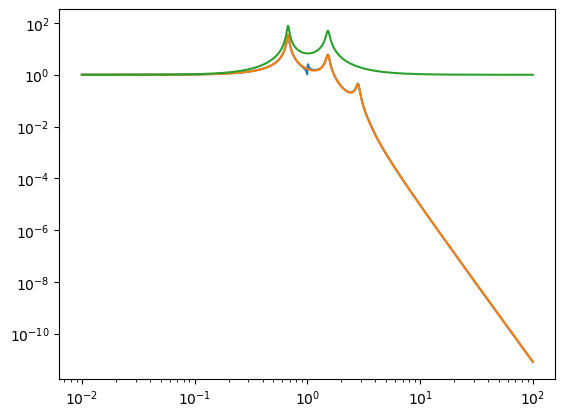

In [63]:
f = np.logspace(-2, 2, 1024)

plt.loglog(f, abs(tf(1j*2*np.pi*f)))
plt.loglog(f, abs(tf_(1j*2*np.pi*f)))
plt.loglog(f, abs(tf_weight(1j*2*np.pi*f)))

In [68]:
tf_ = kontrol.TransferFunction(tf_)
tf_.save("suspension_models/hsts.pkl")

tf_weight = kontrol.TransferFunction(tf_weight)
tf_weight.save("suspension_models/hsts_weight.pkl")